# **Exploratory Data Analysis - Ames Housing Dataset**



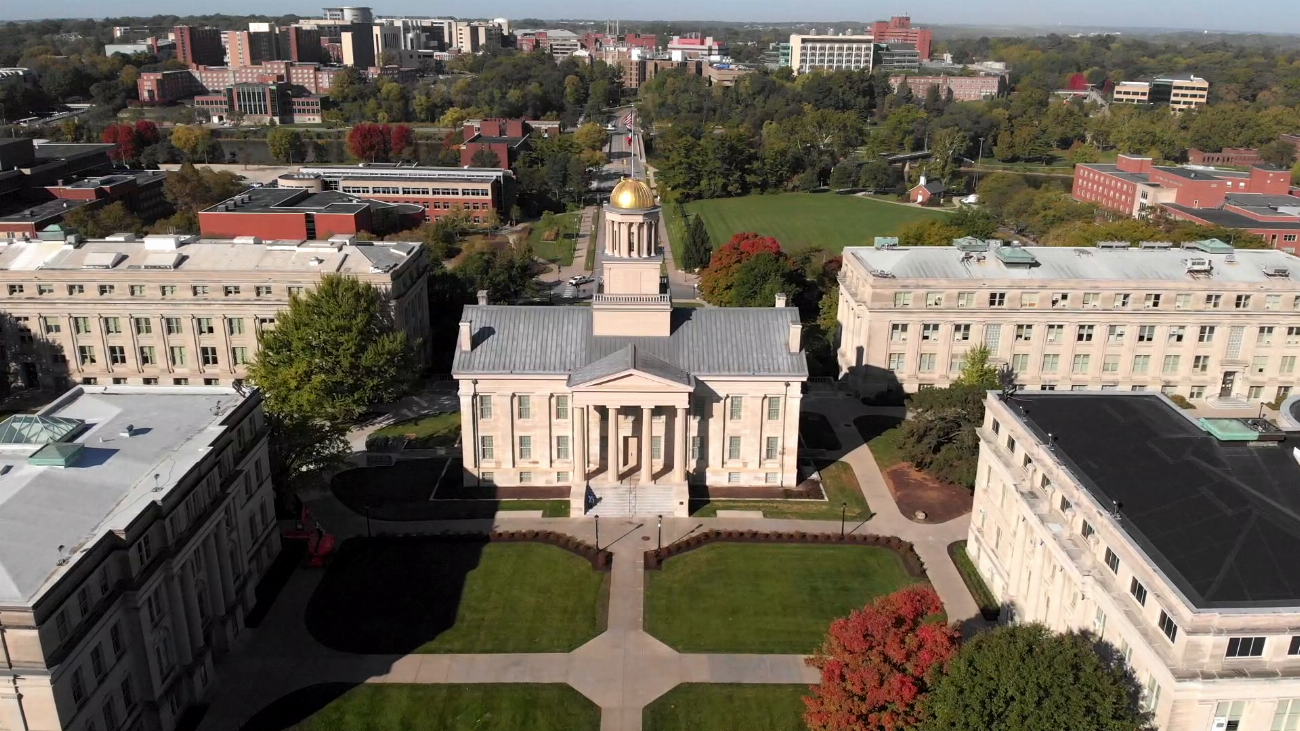

Source: [University of Iowa](https://www.google.com/url?sa=i&url=https%3A%2F%2Fuiowa.edu%2F&psig=AOvVaw1ZYoFogauwQvyimoAnujBE&ust=1670926945693000&source=images&cd=vfe&ved=2ahUKEwjAmc-J7vP7AhXLVsAKHSsBCNQQjRx6BAgAEAo)

## Coursework 1

<br>

Matthew Babajide <br>
Software Development for Data Science <br>
MMI226822 <br>
22/23, Tri A

# Contents

---

<ul>
  <li><a href = '#scrollTo=1GsGJpSSMwq6&line=1&uniqifier=1'>Introduction</a></li>
  <li><a href = '#scrollTo=GjS41nEuM22a&line=5&uniqifier=1'>Objectives</a></li>
  <li><a href = '#scrollTo=0Hj2oBvrIj0B&line=1&uniqifier=1'>Loading the data</a></li>
  <li><a href = '#scrollTo=zhyGrtopMmV2'>Formatting the data</a></li>
  <li><a href = '#scrollTo=lbrFAzfqXRe4&line=1&uniqifier=1'>Data cleaning</a></li>
  <li><a href = '#scrollTo=cuiareVG98sM'>Handling missing data</a></li>
  <li><a href = '#scrollTo=jTDT6jLoPLae&line=1&uniqifier=1'>Dealing with Outliers</a></li>
  <li><a href = '#scrollTo=lnquG_qtOMed&line=1&uniqifier=1'>Exploratory Data Analysis and Visualization</a></li>


</ul>


In [ ]:
# importing essential modules

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Introduction</h1>

The Ames dataset was created as an alternative to the more popular Boston dataset. It was created to allow students display their skills as well as give a more realistic representation of house prices in the current housing market.

<br>

The data is gotten from the Ames City Assesor's Office, it contains property sold in Ames, Iowa between 2006 and 2010.

<br>

The dataset was complied by Dean De Cook, this is his paper on the dataset [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)



<h1>Objectives</h1>

The breakdown of the objects required for this coursework are


1.   Loading the data into Pandas
2.   Formatting the dataset 
3.   Cleaning the dataset
4.   Exploratory Data Analysis
5.   Visualization



# Loading the data

After connecting the colab notebook to google drive, next was to navigate to the folder where the dataset is stored using the magic commands, %ls and cd.

In [ ]:
#Using the list command to identify the folders in the current directory
%ls

drive/  sample_data/


then I changed my directory to where the data is stored

In [ ]:
cd drive/MyDrive/GCU/Software_Dev_CW/

/content/drive/MyDrive/GCU/Software_Dev_CW


In [ ]:
#Checking folders in the current directory
%ls

 AmesHousingDataDocumentation.txt  'Coursework1_GM_TriA_22(1).docx'
 AmesHousing.txt                    Coursework2_21.docx


# Formatting of the dataset

The text file was loaded, then it was observed that the values weren't properly formatted, so the delimiter was set as '\t' and the index was specified as the Order column.

The .head() method is used to view the first rows of the dataset.

In [ ]:
# Reading the data into pandas and querying the first five rows

ames_df = pd.read_csv('AmesHousing.txt', delimiter='\t', index_col='Order')
ames_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Cleaning

Data cleaning involves removing or resolving incomplete, missing or duplicate values from the dataset. Methods to do this include formatting the dataset, removing duplicates, handling missing or na values, removing outliers.

Source: [Tableau](https://www.tableau.com/learn/articles/what-is-data-cleaning)

<br>

### In order to get meaningful answers from our dataset, it is important to understand the type of data, and clean it.

Using some pandas methods the summary of the dataset was gotten. (describe, info and shape)

In [ ]:
#Checking the summary of the data with the .desribe() method.

ames_df.describe(include='all')

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,7,NaN,NaN,2,2,4,4,3,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,2927,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


In [ ]:
# Checking the shape (number of rows and columns) of the data

ames_df.shape

(2930, 81)

In [ ]:
# Getting more information about the dataset using the .info() method

ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### After getting an idea of what the data is, the next step is cleaning the dataset.

## Checking for duplicates in the dataset using the .duplicated pandas method.

The sum method is chained to give a total number of duplicated values instead of the bool output that is returned from the .duplicated() method.

A total sum of 0 shows we have no duplicated entries in the dataset.

In [ ]:
#Checking for duplicate entries in the dataset
ames_df.duplicated().sum()

0

Since the PID column is an ID column, it can also be used to check for duplicates in the dataset.

By plotting the distribution of the column (number times each value occurs), it is observed that each ID value occurs only once.

Thus this column is dropped as it has no missing value and no impact on the price of the property

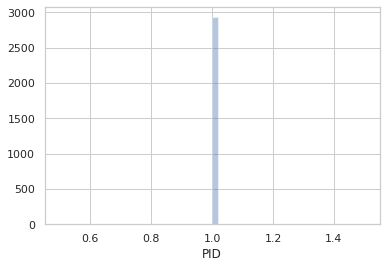

In [ ]:
# plotting the count of individual unique values in the PID column

sns.distplot(ames_df['PID'].value_counts(), kde = False)

In [ ]:
# Drop PID

ames_df.drop(columns = 'PID', inplace = True)

## The next step was to search for features with missing values

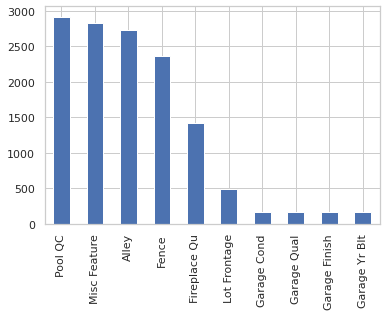

In [ ]:
#Identifying the top 10 columns with the most NA values

null_cols = ames_df.isna().sum()
null_cols = null_cols[ null_cols > 0 ]
null_cols.sort_values( ascending = False, inplace = True )
null_cols.head(10).plot.bar()

In [ ]:
# Displaying the list of columns with missing values.

null_cols

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Cars          1
Garage Area          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

### After identifying the columns with missing values, the missing values were resolved.

# Handling Missing Data

It was observed that Lot Frontage has a significant number of missing values with little or direct influence on the price of the houses, so it was dropped.

Also Garage Yr Built and Year Built are correlated so Garage Yr Blt was also dropped.

In [ ]:
ames_df[['Garage Yr Blt', 'Year Built']].corr()

,Garage Yr Blt,Year Built
Garage Yr Blt,1.000000,0.834849
Year Built,0.834849,1.000000


In [ ]:
#dropping columns Garage Yr Blt and Lot Frontage
ames_df.drop(columns = ['Garage Yr Blt', 'Lot Frontage'], inplace = True)
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Area         2930 non-null   int64  
 3   Street           2930 non-null   object 
 4   Alley            198 non-null    object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

### Using the .value_counts() method, each column with missing data was assessed.

In [ ]:
ames_df['Electrical'].value_counts()

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [ ]:
ames_df['Mas Vnr Area'].value_counts()

0.0       1748
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: Mas Vnr Area, Length: 445, dtype: int64

### From querying the data and reading the data documentation provided the following were observed

The ordinal and norminal features included NA as a category and not the absence of data, so the NA values of type Obj and String were filled with the string 'NA'

For the features with continous data, it was observed that the values were missing because the feature described does not exist in that house. So these values were filled with 0.0, since the columns are of the datatype float.

In [ ]:
# Fill all NA values of type Obj and String with 'NA'

ames_df = ames_df.apply(lambda x: x.fillna('NA') if x.dtype.kind in 'OS' else x.fillna(0.0))

In [ ]:
# Checking top columns with missing values

ames_df.isna().sum().sort_values(ascending = False).head()

MS SubClass      0
Bedroom AbvGr    0
Garage Type      0
Fireplace Qu     0
Fireplaces       0
dtype: int64

At this point, it was confirmed that there are no more columns with missing or null values.

# Dealing with Outlier Values

From the  resource given, it was recommended to drop outlier values shown in the plot below.

The houses whose above-ground living area (in square feet) exceeding 4000 were removed.

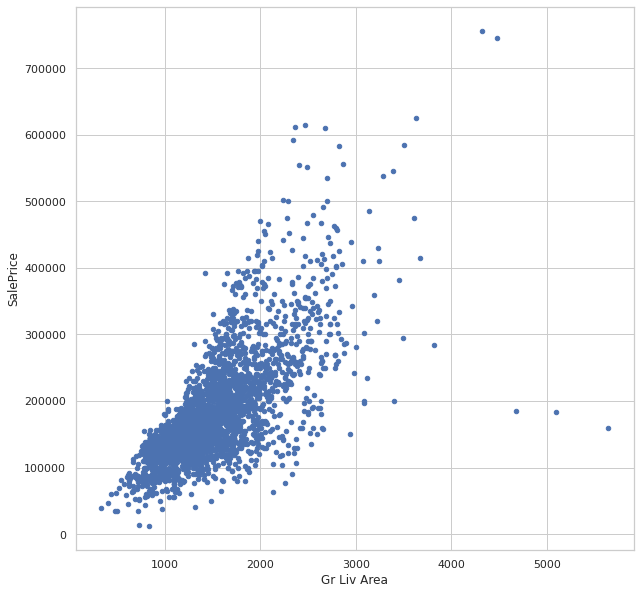

In [ ]:
# Scatterplot of SalePrice against Gr Liv Area

ames_df.plot(x = 'Gr Liv Area', y = 'SalePrice', kind = 'scatter', figsize = (10,10))

In [ ]:
#Summary of the Gr Liv Area feature
ames_df['Gr Liv Area'].describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr Liv Area, dtype: float64

In [ ]:
#Dropping the Gr Liv Area column
ames_df.drop(ames_df[ames_df['Gr Liv Area']> 4000].index, inplace = True)

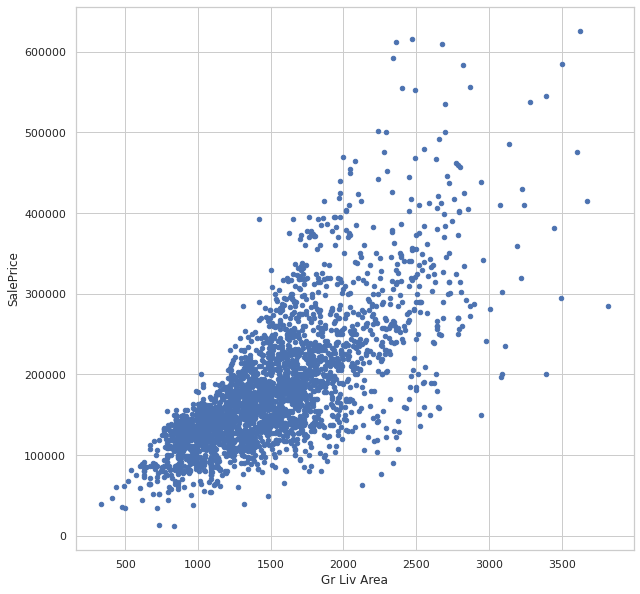

In [ ]:
#Confirming that the rows with outlier values were dropped.
ames_df[['SalePrice', 'Gr Liv Area']].plot(x = 'Gr Liv Area', y = 'SalePrice', kind = 'scatter', figsize = (10,10))

### Since the outlier values have been dealt with, the next step is the exploratory data analysis.

# Exploratory Data Analysis and Visualization


One of the interesting things about the dataset are the neighbourhoods located within Ames

## A count of the number of houses represented is shown as a bar chat

Based on the data, it was observed that the most houses were sold from North Ames (443), the least amount were sold from Landmark (1).

It can be assumed that North ames is a popular destination or the data collection process was biased.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

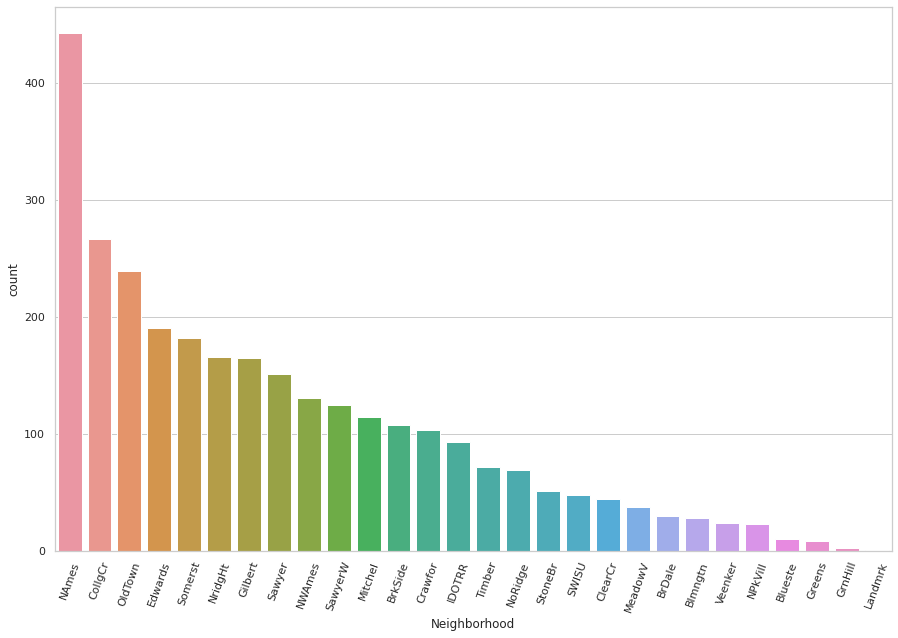

In [ ]:
#A plot of the number of houses in each neighbourhood sorted from the highest to the lowest
plt.figure(figsize=(15,10))
sns.countplot(ames_df.Neighborhood, order = ames_df['Neighborhood'].value_counts().index, label = 'Count')
plt.xticks(rotation = 70)

In [ ]:
#Count of houses in each neighbourhood
ames_df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

## Investigating why North Ames is the most represented neighbourhood

From the data provided, the average Lot Area was aggregated by neighbouhood in order to ascertain if the lot area is the reason for Northern Ames popularity for house owners.  


In [ ]:
#Average lot area of house per neighbourhood
ames_df.groupby(['Neighborhood'])['Lot Area'].mean().sort_values(ascending = False)

Neighborhood
ClearCr    24842.250000
Timber     18233.541667
Veenker    15482.208333
NoRidge    12813.159420
Mitchel    12019.964912
NWAmes     11661.694656
Crawfor    11650.106796
StoneBr    11383.392157
Gilbert    11342.369697
NridgHt    11216.524096
Sawyer     10371.854305
SawyerW    10155.248000
NAmes      10039.702032
CollgCr     9999.752809
Edwards     9768.078534
GrnHill     9001.000000
IDOTRR      8826.473118
OldTown     8240.903766
SWISU       7615.375000
Somerst     7610.675824
BrkSide     6959.777778
Greens      3884.000000
Landmrk     3612.000000
Blmngtn     3399.357143
NPkVill     2755.608696
Blueste     2346.500000
MeadowV     2109.027027
BrDale      1840.633333
Name: Lot Area, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

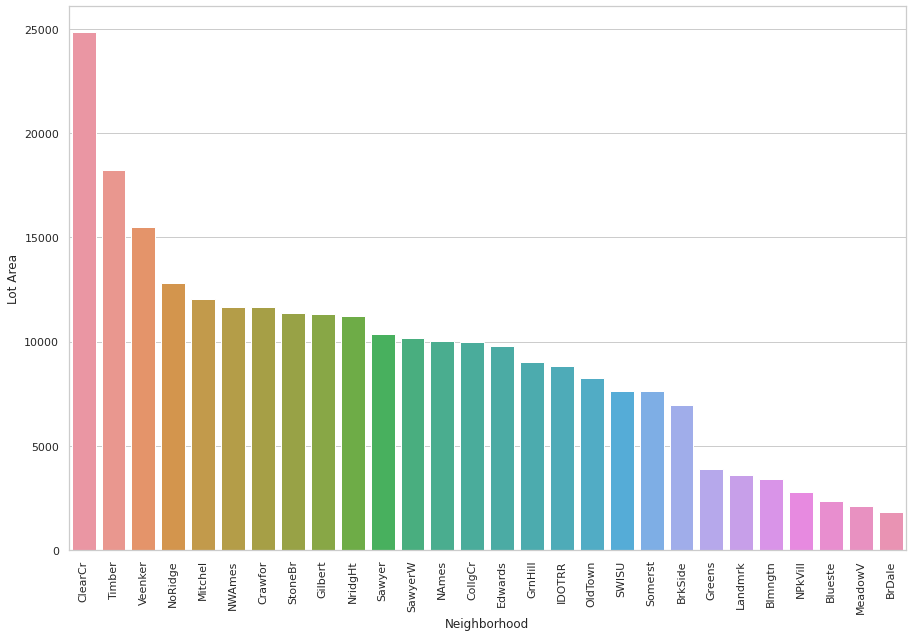

In [ ]:
#Plot of the average lot area per neighbourhood sorted in descending order
plt.figure(figsize=(15,10))
sns.barplot(data = ames_df, x = 'Neighborhood', y = 'Lot Area', ci = None, order = ames_df.groupby(['Neighborhood'])['Lot Area'].mean().sort_values(ascending = False).index)
plt.xticks(rotation = 90)

Compared to the rest of the neighbourhoods, North Ames neither has a larger or smaller lot area, than average. So it becomes clear that the Lot Area is not the reason for Northern Ames popularity

Next we investigate the average price of houses in each neighbourhood, to check if the price of the house has an effect on why Northern Ames has the highest number of houses sold in our dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

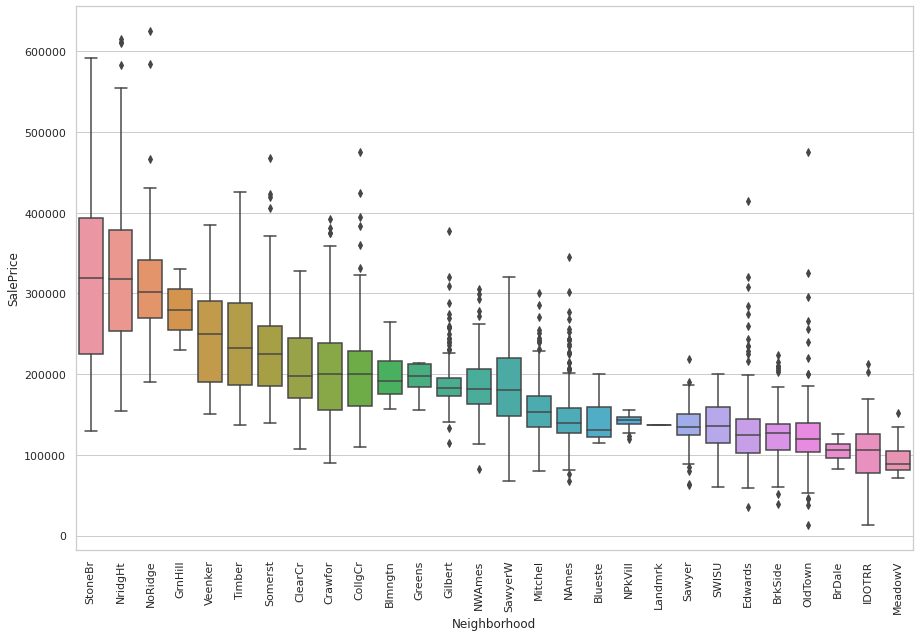

In [ ]:
#Box plot of Sale Price vs Neighbourhood sorted in descending order.
plt.figure(figsize=(15,10))
sns.boxplot(data = ames_df, x = 'Neighborhood', y = 'SalePrice', order = ames_df.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending = False).index)
plt.xticks(rotation = 90)

Compared to the rest of the neighbourhoods, the price of houses in North Ames is not much lower than average. So Sale Price is not the main reason for Northern Ames popularity.

Next we investigate the type of houses in each neighbourhood, to check if the type of house has an effect on why Northern Ames has the highest number of houses sold in our dataset.

### Inspecting the impact of the zoning classification and Sales Price on the Neighbourhood

<br>

Below is a scatter plot of the price of the houses grouped by the neighbourhoods and segregated zoning classification.

<br>


*   RL - Residential Low Density
*   RH - Residential High Density
*   FV - Floating Village Residential
*   RM - Residential Medium Density
*   C  - Commercial
*   I  - Industrial
*   A  - Agriculture

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

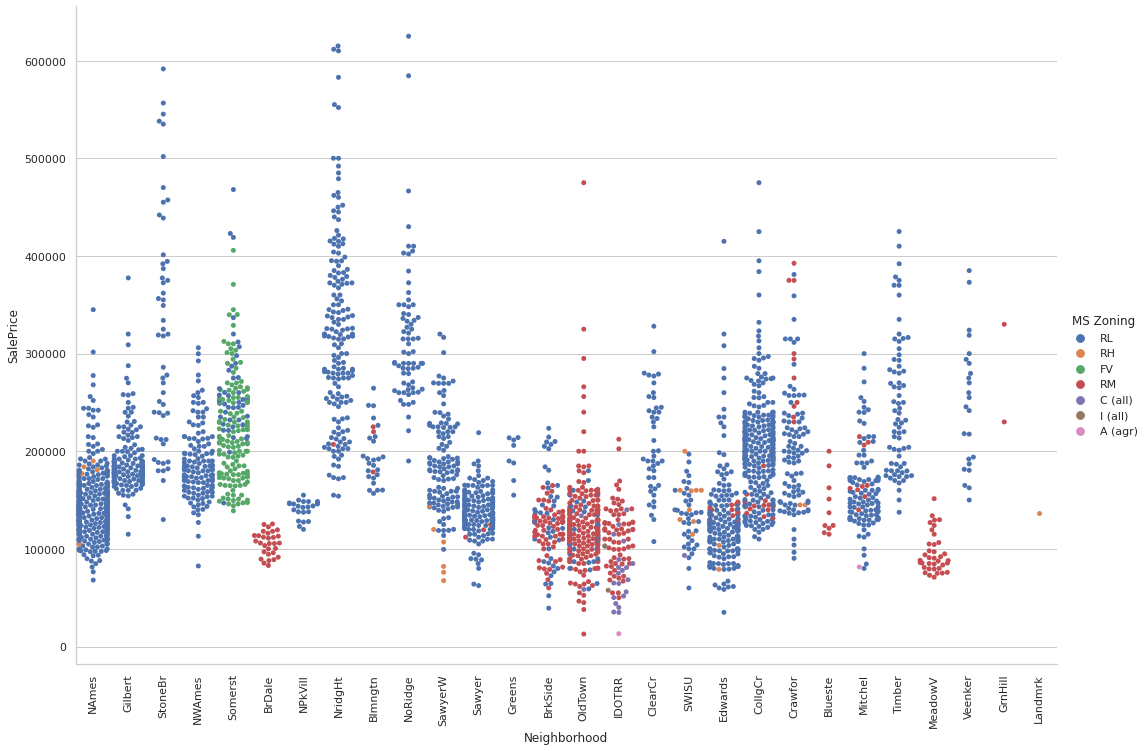

In [ ]:
#Scatter plot of the sale price of houses in each neighbourhood segregated by zoning classification
sns.catplot(data=ames_df, x="Neighborhood", y="SalePrice", hue="MS Zoning", kind="swarm", height = 10, aspect = 1.5)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

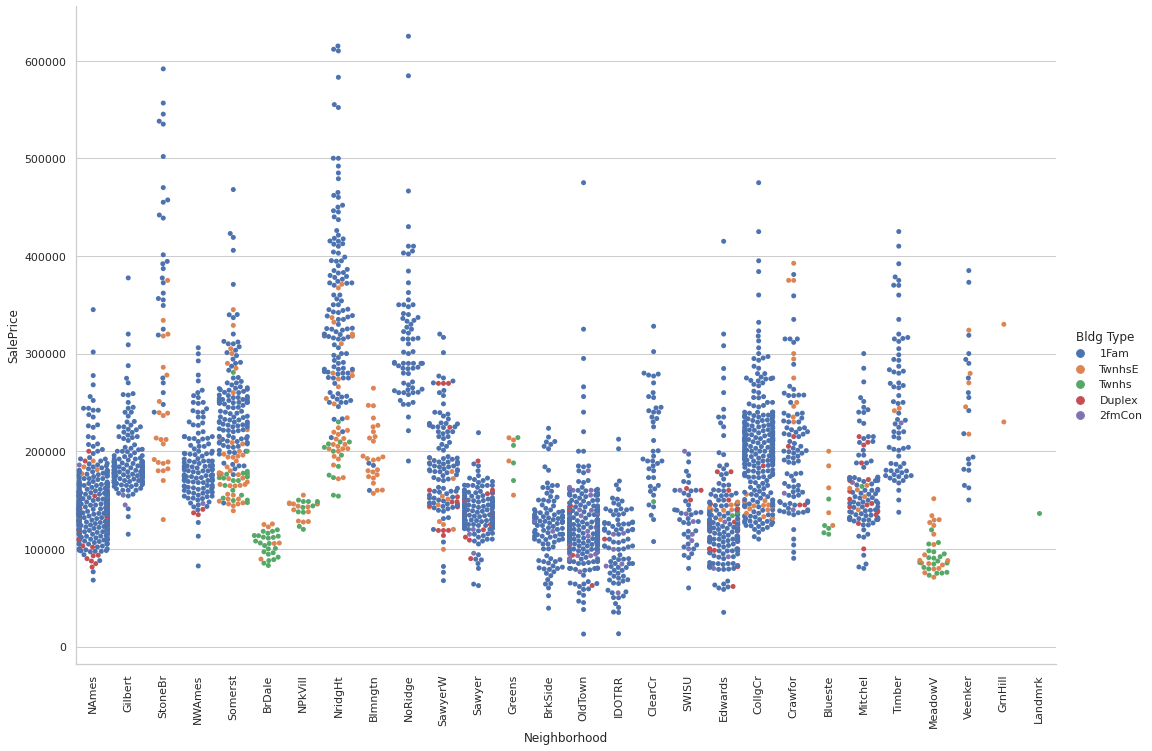

In [ ]:
#Scatter plot of the sale price of houses in each neighbourhood segregated by type of dwelling
sns.catplot(data=ames_df, x="Neighborhood", y="SalePrice", hue="Bldg Type", kind="swarm", height = 10, aspect = 1.5)
plt.xticks(rotation = 90)

From the plots above it is observed that the houses in Northern Ames are mostly Single-family Detached, Residential Low Density houses priced between \$100,000 and \$200,000

It can also be seen that majority of the houses sold are low density residential houses. This shows that this is the most common house type sold in the Ames region.

Based on this observation, one reason for Northern Ames popularity can be assumed as the relatively low price of Residential Low Density houses sold.

Other popular neighbourhoods for relately cheap Single-family Detached, Residential Low Density houses are Gilbert, Northwest Ames, Sawyer, Edwards and College Creek.

Brookside, Old Town, Iowa DOT and Rail Road are popular neighbourhoods for relately cheap Single-family Detached, Residential Medium Density houses

It is interesting to note that the Somerset neighbourhood mostly consists of houses on water. Based on the dataset, this is the only region where houses built on water can be found.

## Another interesting observation is how the zoning classification relates with price

There are 7 Zoning classifications, the most common observed in our dataset is Residential Low Density, 2268 houses belong to this zone out of the 2925 houses recorded.

In [ ]:
#The summary of the MS Zoning feature
ames_df['MS Zoning'].describe()

count     2925
unique       7
top         RL
freq      2268
Name: MS Zoning, dtype: object

The average prices of houses in each zone is calculated and shown below.

In [ ]:
# Average Price of Houses per Zone
ames_df.groupby(['MS Zoning'])['SalePrice'].mean().sort_values(ascending = False)

MS Zoning
FV         218986.949640
RL         190810.507496
RH         136419.777778
RM         126781.393939
I (all)     80312.500000
C (all)     79795.040000
A (agr)     47300.000000
Name: SalePrice, dtype: float64

In [ ]:
ames_df['MS Zoning'].value_counts()

RL         2268
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

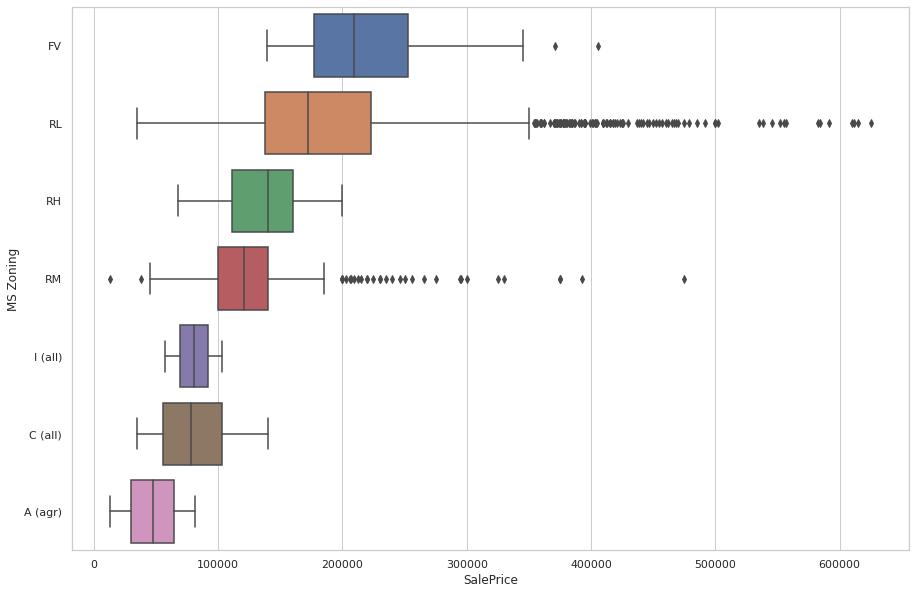

In [ ]:
#Box plot of Sale Price vs Zoning Classification
plt.figure(figsize=(15,10))
sns.boxplot(data = ames_df, x = 'SalePrice', y = 'MS Zoning', order = ames_df.groupby(['MS Zoning'])['SalePrice'].mean().sort_values(ascending = False).index, orient = 'h')

### From the above box plot, the following was observed.

The Floating Village Residential zone has the highest average price of houses sold. It is positively skewed (skewed right) and has a high distribution of data points with a few outlier values

The Residential Low Density zone has the most outlier values present in the dataset, it also has the highest distribution of data data points

The Residential Medium Density zone also has a lot of outlier values present but has a narrower and normal shaped distribution.

The remaining distributions have too little entries to make meaning deductions from.